In [13]:
from sklearn.linear_model import LogisticRegression as LR
from sklearn.datasets import load_breast_cancer
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [14]:
data = load_breast_cancer()

In [15]:
x = data.data
y = data.target

In [39]:
x.shape[0]

569

In [17]:
lrl1 = LR(penalty = 'l1',C=0.5,solver='liblinear',max_iter=1000)
lrl1

In [18]:
lrl2 = LR(penalty = 'l2',C=0.5,solver='liblinear',max_iter=1000)

In [19]:
lrl1 = lrl1.fit(x,y)

In [20]:
lrl1.coef_

array([[ 3.97847593,  0.03109475, -0.13401176, -0.01617998,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.50137215,  0.        , -0.0712046 ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        , -0.24484224, -0.12834177, -0.0144415 ,  0.        ,
         0.        , -2.0624731 ,  0.        ,  0.        ,  0.        ]])

In [21]:
(lrl1.coef_!=0).sum(axis=1)

array([10])

In [22]:
lrl2.fit(x,y)

LogisticRegression(C=0.5, max_iter=1000, solver='liblinear')

In [23]:
lrl2.coef_

array([[ 1.61358623e+00,  1.00284781e-01,  4.61036191e-02,
        -4.21333984e-03, -9.27388895e-02, -3.00561176e-01,
        -4.53477303e-01, -2.19973055e-01, -1.33257382e-01,
        -1.92654788e-02,  1.87887747e-02,  8.75532438e-01,
         1.31708341e-01, -9.53440922e-02, -9.64408195e-03,
        -2.52457845e-02, -5.83085040e-02, -2.67948347e-02,
        -2.74103894e-02, -6.09326731e-05,  1.28405755e+00,
        -3.00219699e-01, -1.74217870e-01, -2.23449384e-02,
        -1.70489339e-01, -8.77400140e-01, -1.15869741e+00,
        -4.22909464e-01, -4.12968162e-01, -8.66604813e-02]])

In [24]:
(lrl2.coef_!=0).sum(axis=1)

array([30])

In [25]:
l1 = []
l2 = []
l1test = []
l2test = []
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=420)

In [26]:
for i in np.linspace(0.05,1,19):
    lrl1 = LR(penalty='l1',C=i,solver='liblinear',max_iter=1000)
    lrl2 = LR(penalty='l2',C=i,solver='liblinear',max_iter=1000)
    lrl1.fit(x_train,y_train)
    l1.append(accuracy_score(lrl1.predict(x_train),y_train))
    l1test.append(accuracy_score(lrl1.predict(x_test),y_test))
    lrl2.fit(x_train,y_train)
    l2.append(accuracy_score(lrl2.predict(x_train),y_train))
    l2test.append(accuracy_score(lrl2.predict(x_test),y_test))    


In [27]:
l1

[0.9422110552763819,
 0.9447236180904522,
 0.9597989949748744,
 0.9597989949748744,
 0.9597989949748744,
 0.964824120603015,
 0.9623115577889447,
 0.964824120603015,
 0.9597989949748744,
 0.9597989949748744,
 0.9623115577889447,
 0.964824120603015,
 0.9673366834170855,
 0.9673366834170855,
 0.9698492462311558,
 0.9698492462311558,
 0.9698492462311558,
 0.9698492462311558,
 0.9698492462311558]

In [28]:
graph = [l1,l2,l1test,l2test]
color = ["green","black","lightgreen",'gray']
label = ["l1","l2","l1test","l2test"]


0 [0.9422110552763819, 0.9447236180904522, 0.9597989949748744, 0.9597989949748744, 0.9597989949748744, 0.964824120603015, 0.9623115577889447, 0.964824120603015, 0.9597989949748744, 0.9597989949748744, 0.9623115577889447, 0.964824120603015, 0.9673366834170855, 0.9673366834170855, 0.9698492462311558, 0.9698492462311558, 0.9698492462311558, 0.9698492462311558, 0.9698492462311558]
1 [0.9597989949748744, 0.9547738693467337, 0.957286432160804, 0.957286432160804, 0.957286432160804, 0.957286432160804, 0.957286432160804, 0.9623115577889447, 0.9673366834170855, 0.964824120603015, 0.9623115577889447, 0.964824120603015, 0.9673366834170855, 0.9698492462311558, 0.9698492462311558, 0.9698492462311558, 0.9698492462311558, 0.9698492462311558, 0.9723618090452262]
2 [0.9122807017543859, 0.9239766081871345, 0.9298245614035088, 0.9239766081871345, 0.9239766081871345, 0.9239766081871345, 0.9181286549707602, 0.9239766081871345, 0.9239766081871345, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0

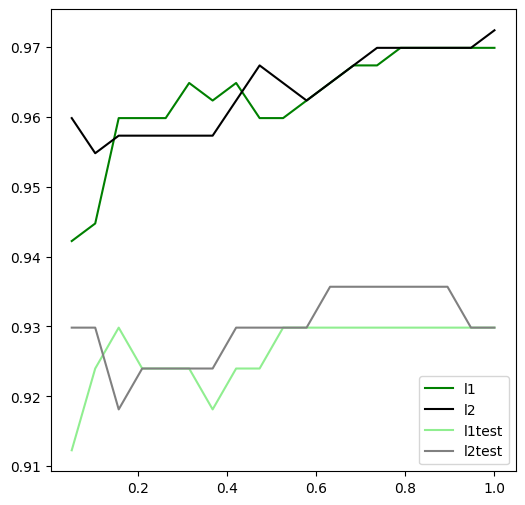

In [29]:
plt.figure(figsize=(6,6))
for i in range(len(graph)):
    plt.plot(np.linspace(0.05,1,19),graph[i],color[i],label = label[i])
    print(i,graph[i])
plt.legend(loc = 4)
plt.show()

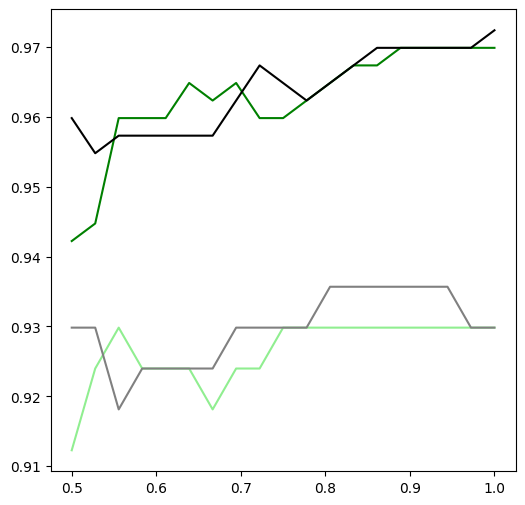

In [30]:
graph = [l1,l2,l1test,l2test]
color = ["green","black","lightgreen",'gray']
label = ["l1","l2","l1test","l2test"]
plt.figure(figsize=(6,6))
for i in range(len(graph)):
    plt.plot(np.linspace(0.5,1,19),graph[i],color[i],label = label[i])
plt.show()

In [31]:
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel

In [32]:
LR_ = LR(solver='liblinear',C = 0.9,random_state=420)

In [33]:
cross_val_score(LR_,data.data,data.target,cv=10).mean()

0.9490601503759398

In [34]:
x_embedded = SelectFromModel(LR_,norm_order=1).fit_transform(data.data,data.target)

In [35]:
x_embedded.shape

(569, 9)

In [36]:
threshold = np.linspace(0,abs(LR_.fit(data.data,data.target).coef_).max(),20)

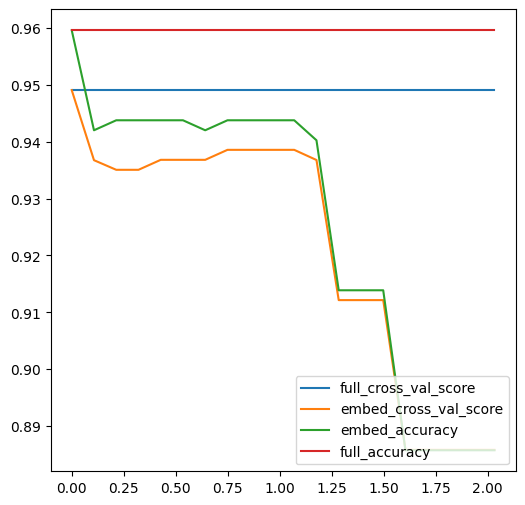

In [37]:
l1 = []
l2 = []
lfull = []
lembed = []

for i in threshold:
    x_embedded = SelectFromModel(LR_,threshold = i,norm_order=1).fit_transform(data.data,data.target)
    lfull.append(cross_val_score(LR_,data.data,data.target,cv=10).mean())
    lembed.append(cross_val_score(LR_,x_embedded,data.target,cv=10).mean())
    LR_.fit(x_embedded,data.target)
    l1.append(accuracy_score(LR_.predict(x_embedded),data.target))
    LR_.fit(data.data,data.target)
    l2.append(accuracy_score(LR_.predict(data.data),data.target))
graph = [lfull,lembed,l1,l2]
plt.figure(figsize=(6,6))
color = ["red","blue","green","yellow"]
label = ["full_cross_val_score","embed_cross_val_score","embed_accuracy","full_accuracy"]
for i in range(len(graph)):
    plt.plot(threshold,graph[i],label=label[i])
plt.legend(loc = 4)
plt.show()


In [38]:
# 画C的学习曲线
fullx = []
fsx = []
